# 1. 단변량 데이터 탐색

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/Ex_CEOSalary.csv', encoding='utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


In [3]:
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


1.1 범주형 자료의 탐색

In [4]:
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [5]:
data01 = data.copy()
data01['industry'] = data01['industry'].replace({1: 'Service', 2: 'IT', 3: 'Finance', 4: 'Others'})
data01['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

In [6]:
data['industry'] = data['industry'].replace([1, 2, 3, 4], ['Service', 'IT', 'Finance', 'Others'])
data['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

In [7]:
data['industry'] = data['industry'].replace([1, 2, 3, 4], ['Service', 'IT', 'Finance', 'Others'])
data['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

<AxesSubplot:ylabel='industry'>

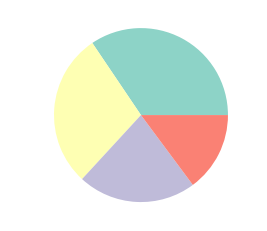

In [8]:
%matplotlib inline
data['industry'].value_counts().plot(kind='pie')

<AxesSubplot:>

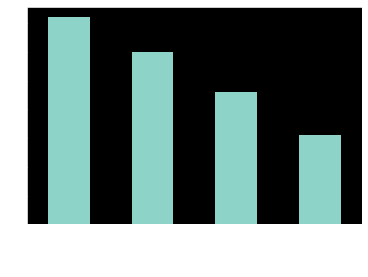

In [9]:
data['industry'].value_counts().plot(kind='bar')

1.2 연속형 자료의 탐색

In [10]:
data_describe = data.describe()
data_describe

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


In [11]:
print(type(data_describe))
print(data_describe.columns)
print(data_describe.index)

print(data_describe[['salary']])
print(data_describe.loc['min'])

<class 'pandas.core.frame.DataFrame'>
Index(['salary', 'sales', 'roe'], dtype='object')
Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')
             salary
count    209.000000
mean    1281.119617
std     1372.345308
min      223.000000
25%      736.000000
50%     1039.000000
75%     1407.000000
max    14822.000000
salary    223.000000
sales     175.199997
roe         0.500000
Name: min, dtype: float64


In [12]:
data.skew()

/var/folders/rw/2hzjjgx52j57bvr5qsyw6kp80000gn/T/ipykernel_2312/1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

In [13]:
data.kurtosis()

/var/folders/rw/2hzjjgx52j57bvr5qsyw6kp80000gn/T/ipykernel_2312/2361870383.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurtosis()


salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

In [38]:
print(type(data.kurtosis()))
print(data.kurtosis()['salary'])

<class 'pandas.core.series.Series'>
58.97122941865257


/var/folders/rw/2hzjjgx52j57bvr5qsyw6kp80000gn/T/ipykernel_2312/1881359151.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(type(data.kurtosis()))
/var/folders/rw/2hzjjgx52j57bvr5qsyw6kp80000gn/T/ipykernel_2312/1881359151.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.kurtosis()['salary'])


# 2. 이변량 데이터 탐색

In [14]:
data.corr()

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [15]:
data.corr(method='pearson')

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [16]:
data.corr(method='spearman')

,salary,sales,roe
salary,1.000000,0.528016,0.205984
sales,0.528016,1.000000,-0.170548
roe,0.205984,-0.170548,1.000000


In [17]:
data.corr(method='kendall')

,salary,sales,roe
salary,1.000000,0.363921,0.143672
sales,0.363921,1.000000,-0.123844
roe,0.143672,-0.123844,1.000000


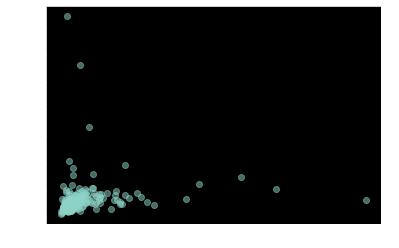

In [18]:
import matplotlib.pyplot as plt
plt.scatter(data['sales'], data['salary'], alpha=0.5)
plt.show()

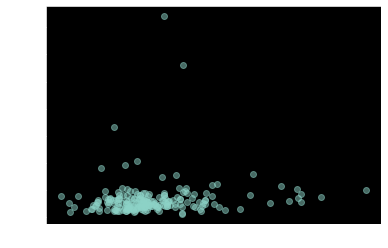

In [19]:
plt.scatter(data['roe'], data['salary'], alpha=0.5)
plt.show()

In [20]:
data.groupby('industry')[['salary']].describe()

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
Finance    60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
IT         46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
Others     31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   
Service    72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   

                   
              max  
industry           
Finance   14822.0  
IT         6640.0  
Others     1100.0  
Service    3844.0

In [21]:
print(type(data.groupby('industry')[['salary']]))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


# 3. 이상치 처리

<AxesSubplot:>

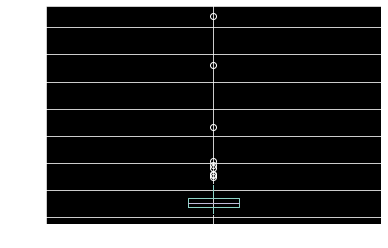

In [22]:
data.boxplot(column='salary', return_type='axes')

<AxesSubplot:>

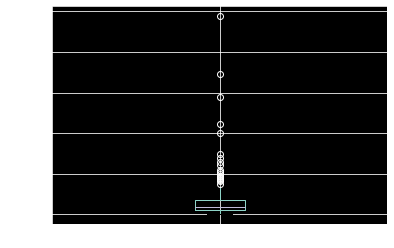

In [23]:
data.boxplot(column='sales', return_type='axes')

<AxesSubplot:>

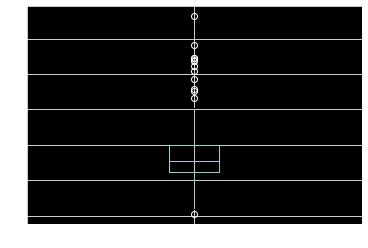

In [24]:
data.boxplot(column='roe', return_type='axes')

3.1 salary 변수 이상치 처리

3.2 sales 변수 이상치 처리

In [25]:
Q1_salary = data['salary'].quantile(q=0.25)
Q3_salary = data['salary'].quantile(q=0.75)
IQR_salary = Q3_salary - Q1_salary
print(IQR_salary)

671.0


In [26]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 6.7+ KB
None
             salary         sales         roe
count    209.000000    209.000000  209.000000
mean    1281.119617   6923.793282   17.184211
std     1372.345308  10633.271088    8.518509
min      223.000000    175.199997    0.500000
25%      736.000000   2210.300049   12.400000
50%     1039.000000   3705.199951   15.500000
75%     1407.000000   7177.000000   20.000000
max    14822.000000  97649.898438   56.299999


In [27]:
data_IQR = data[(data['salary'] < Q3_salary + IQR_salary * 1.5) 
                & (data['salary'] > Q1_salary - IQR_salary * 1.5)]

print(data_IQR.info())
print(data_IQR.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    200 non-null    int64  
 1   sales     200 non-null    float64
 2   roe       200 non-null    float64
 3   industry  200 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 7.8+ KB
None
            salary         sales         roe
count   200.000000    200.000000  200.000000
mean   1071.165000   6654.959482   17.142500
std     458.861611  10190.814652    8.542059
min     223.000000    175.199997    0.500000
25%     729.750000   2167.550049   12.400000
50%     998.500000   3628.949951   15.450000
75%    1345.750000   6913.150146   19.925000
max    2408.000000  97649.898438   56.299999


<AxesSubplot:>

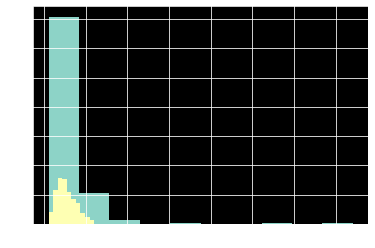

In [28]:
data['salary'].hist()
data_IQR['salary'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

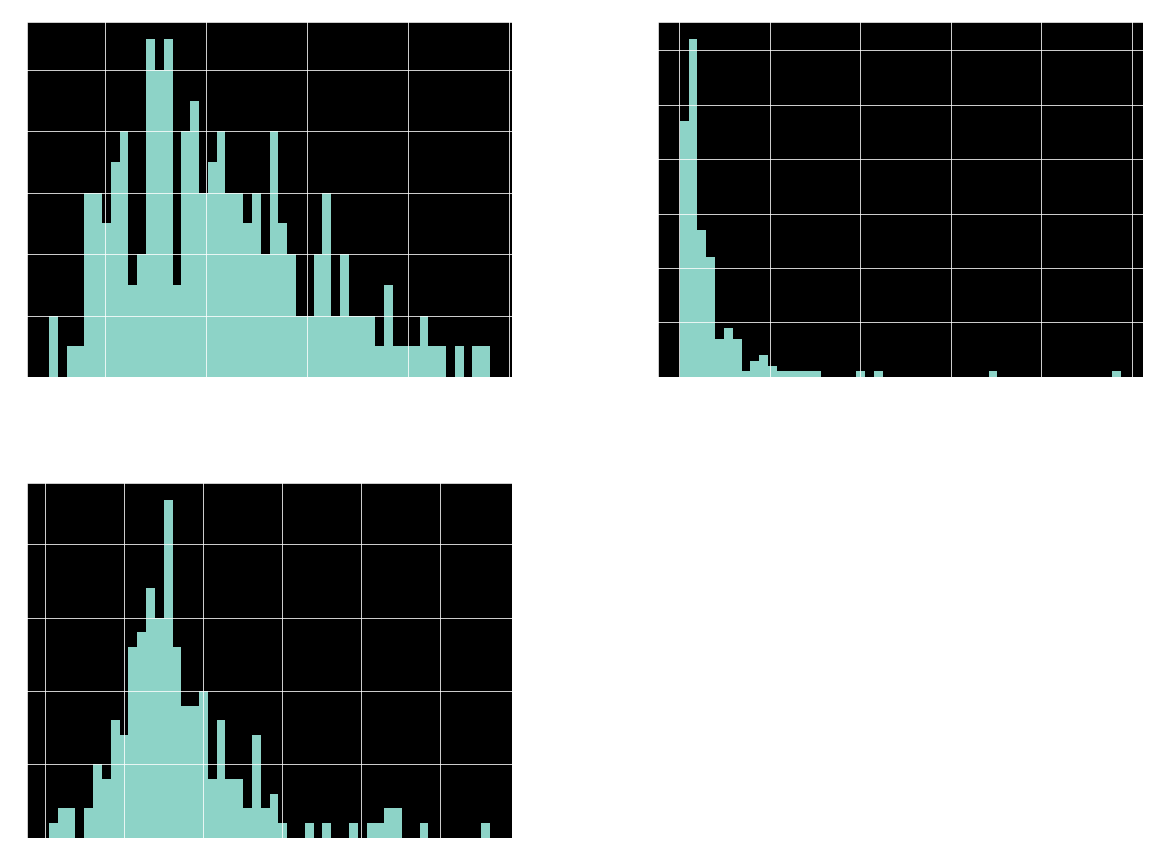

In [29]:
data_IQR.hist(bins=50, figsize=(20, 15))

In [30]:
import numpy as np
data['log_salary'] = np.log(data['salary'])
data['log_sales'] = np.log(data['sales'])
data['log_roe'] = np.log(data['roe'])

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   salary      209 non-null    int64  
 1   sales       209 non-null    float64
 2   roe         209 non-null    float64
 3   industry    209 non-null    object 
 4   log_salary  209 non-null    float64
 5   log_sales   209 non-null    float64
 6   log_roe     209 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 11.6+ KB
None
             salary         sales         roe  log_salary   log_sales  \
count    209.000000    209.000000  209.000000  209.000000  209.000000   
mean    1281.119617   6923.793282   17.184211    6.950386    8.292265   
std     1372.345308  10633.271088    8.518509    0.566374    1.013161   
min      223.000000    175.199997    0.500000    5.407172    5.165928   
25%      736.000000   2210.300049   12.400000    6.601230    7.700884   
50%     1039.000000  

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'log_salary'}>],
       [<AxesSubplot:title={'center':'log_sales'}>,
        <AxesSubplot:title={'center':'log_roe'}>]], dtype=object)

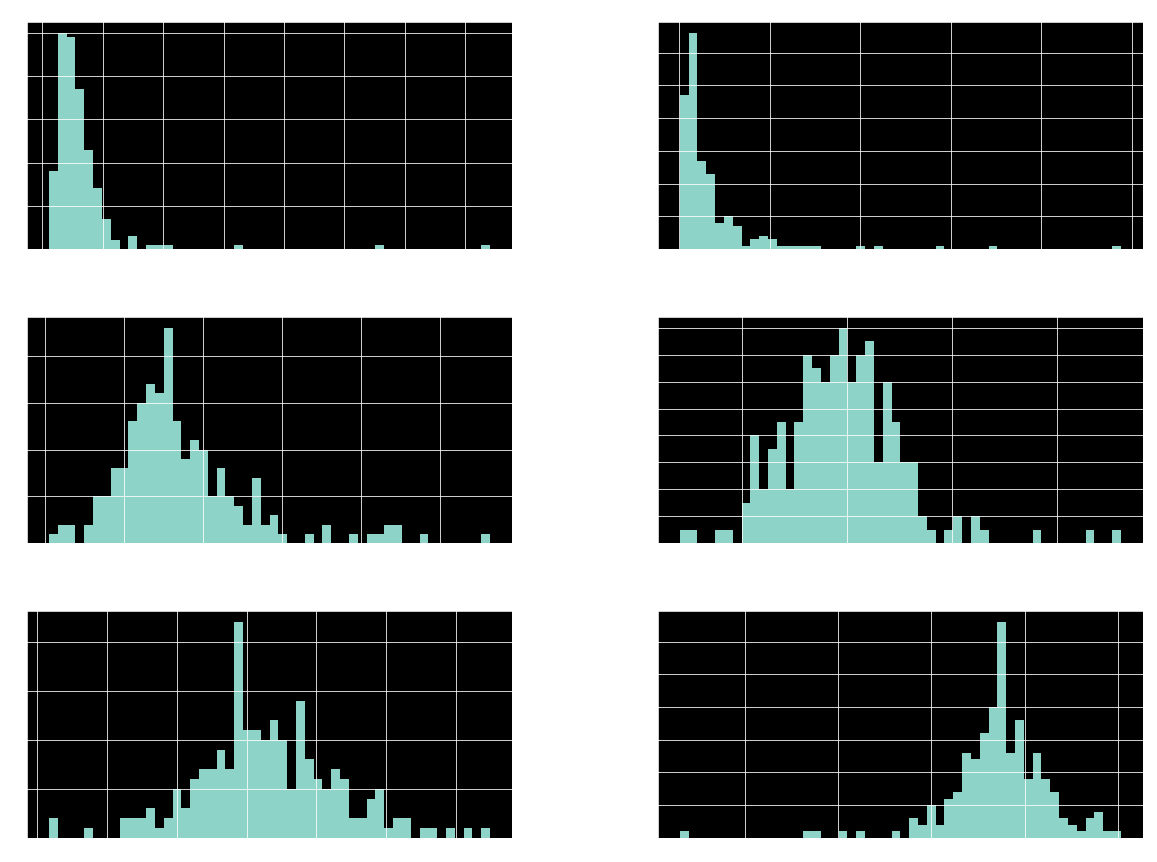

In [31]:
data.hist(bins=50, figsize=(20, 15))

In [32]:
data.corr()

,salary,sales,roe,log_salary,log_sales,log_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000
